In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [61]:
df.describe()
df.shape

(12684, 26)

In [62]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

In [63]:
#dropped columns car and 'toCoupon_GEQ5min' from the dataframe
#as thare is only 1 value in the data
df.shape
df = df.drop(columns=['car', 'toCoupon_GEQ5min'], errors='ignore')

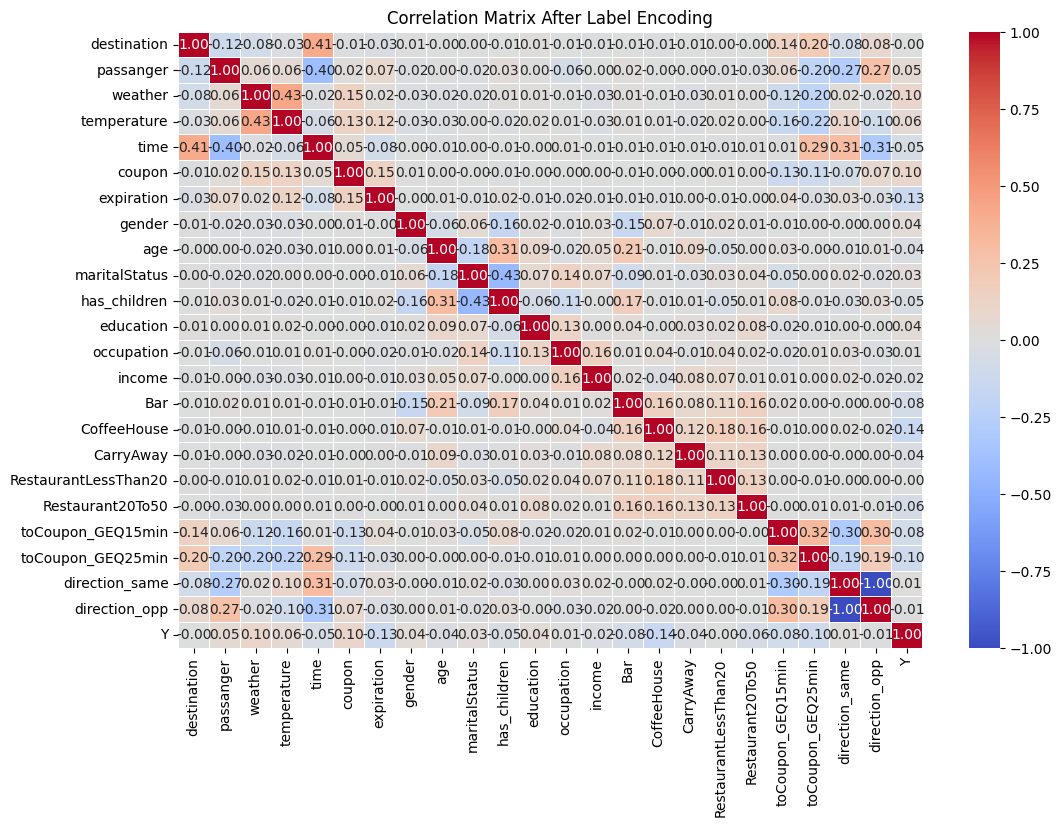

In [64]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply label encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder if needed later

# Now, compute correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Label Encoding")
plt.show()

In [65]:
df = df.fillna(df.mode().iloc[0])
df.shape

(12684, 24)

In [66]:
df = df.loc[:, ~df.columns.duplicated()]
df.shape

(12684, 24)

In [67]:
df.to_csv('CLEANED_CLASS_DATA.csv', index=False)


In [68]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
1    6283
0    3237
2    3164
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
0    7305
1    3298
3    1075
2    1006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
2    10069
1     1405
0     1210
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
3    3230
4    3164
0    2275
2    2009
1    2006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
2    3996
4    2786
1    2393
0    2017
3    1492
Name: count, dtype: int64
Missing values: 0
-----------------------------

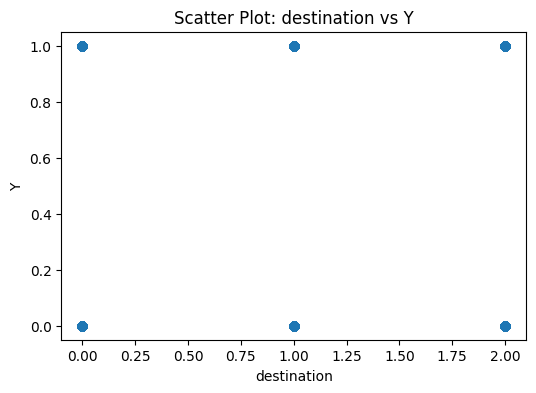

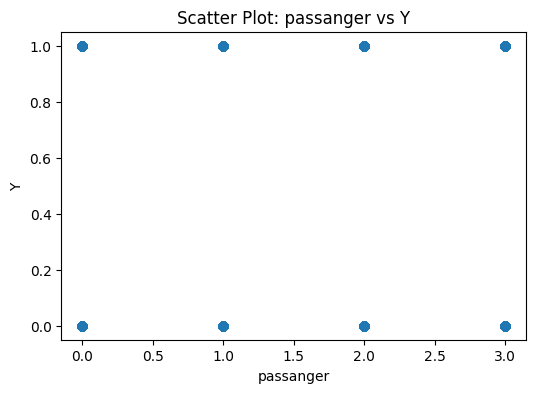

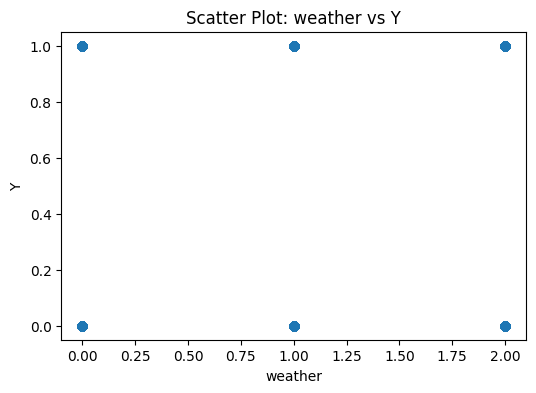

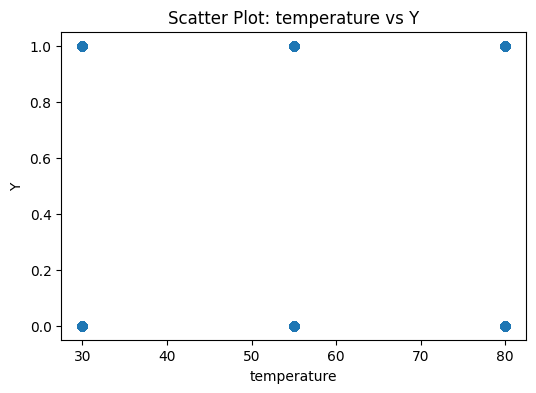

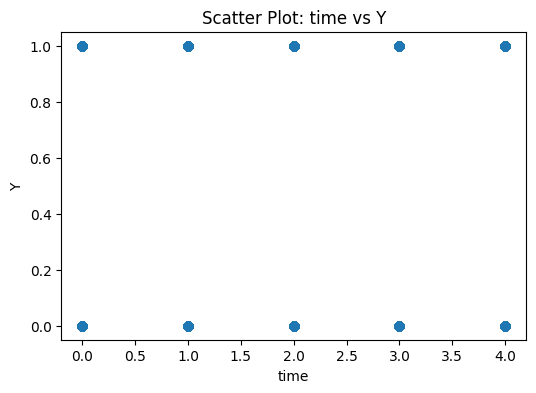

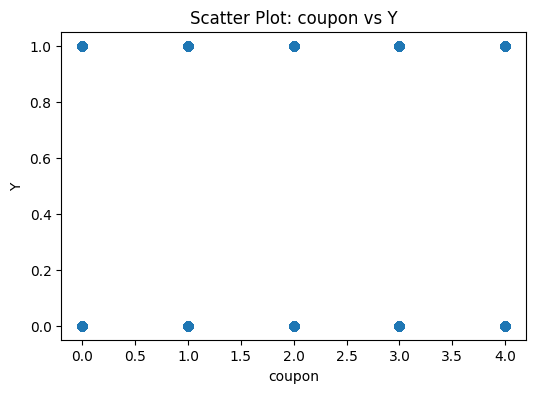

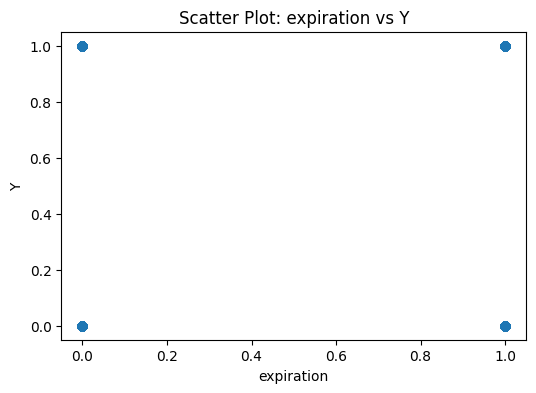

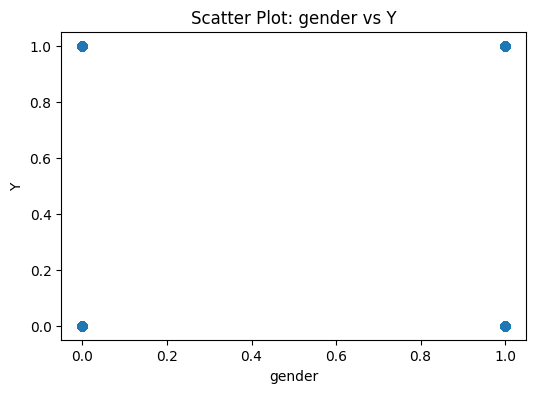

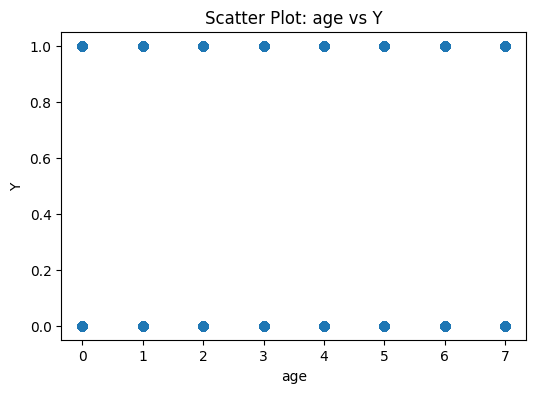

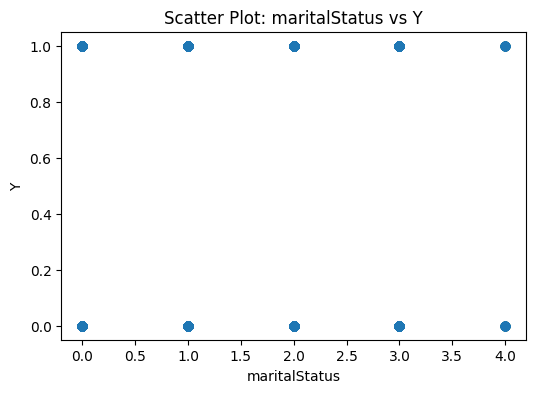

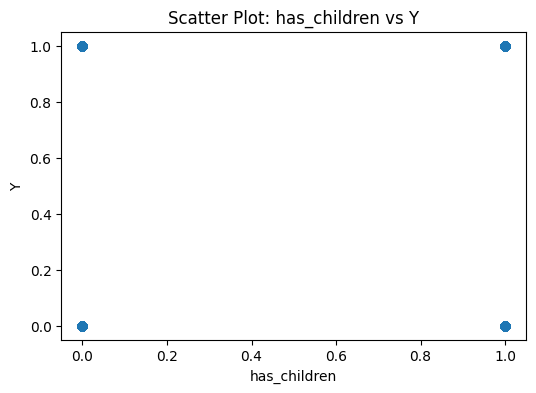

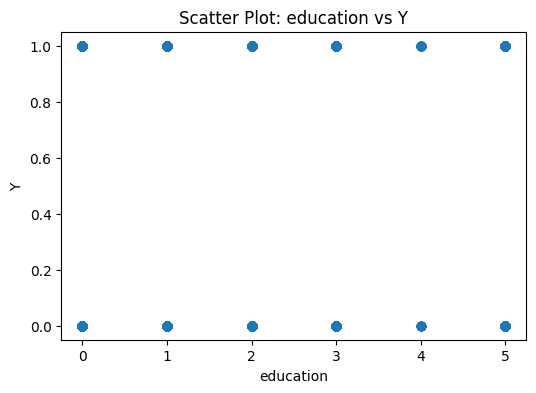

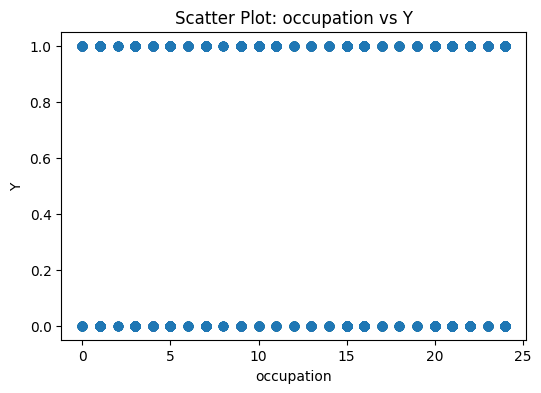

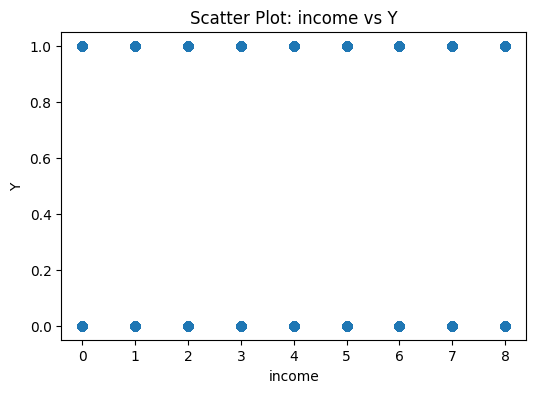

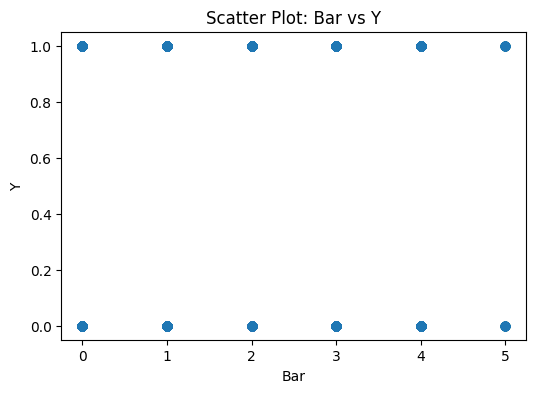

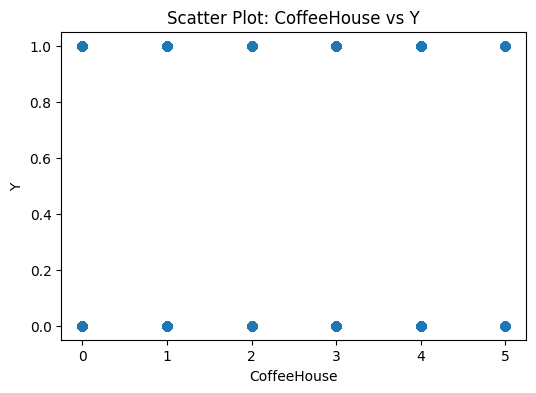

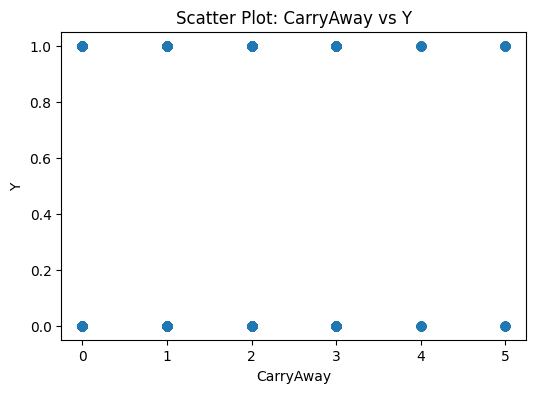

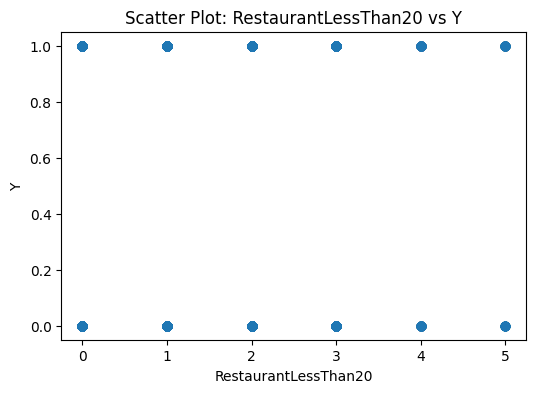

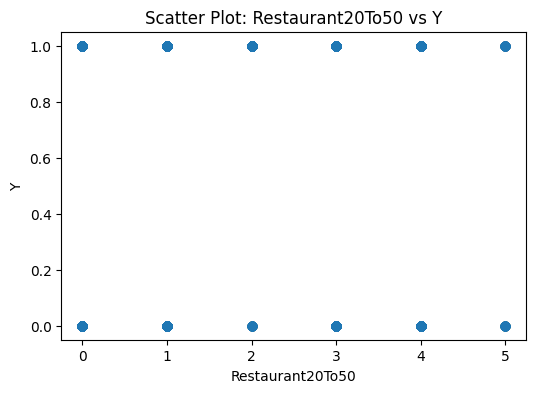

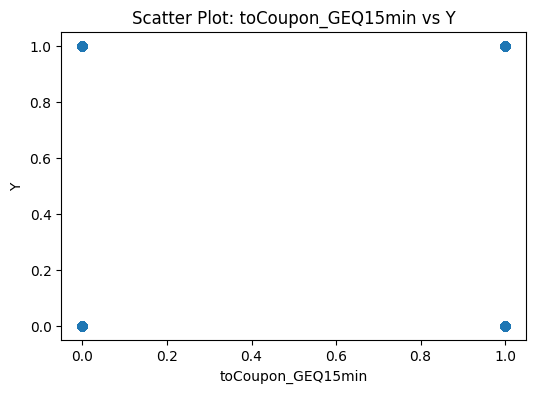

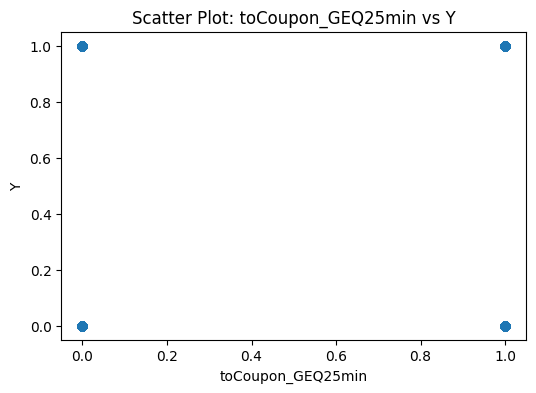

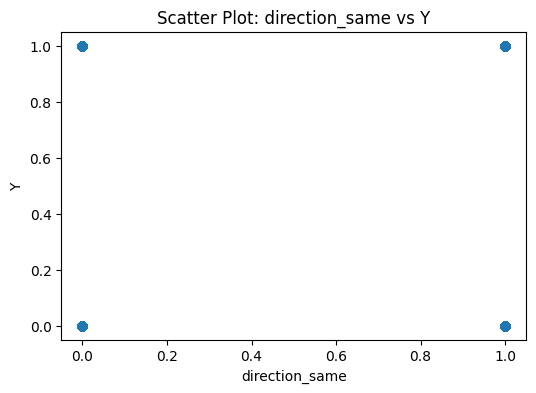

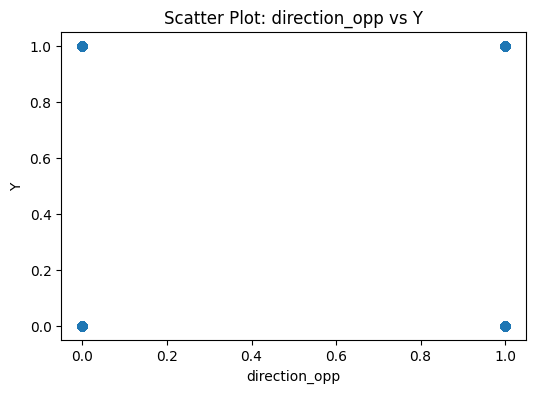

In [69]:
for col in df.columns:
    if col != 'Y':
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df['Y'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('Y')
        plt.title(f'Scatter Plot: {col} vs Y')
        plt.show()

In [41]:
print(df.columns.tolist())  # Print all column names to check for typos or spaces


['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [70]:
cols = ['occupation','maritalStatus', 'Bar', 'education', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50']

for col in cols:
    print(f"\nValue counts for {col}:")

    # Get counts of 'Y' values grouped by the categorical column
    counts = df.groupby(col)['Y'].value_counts().unstack(fill_value=0)

    # Rename columns for clarity
    counts.columns = ['No (Y=0)', 'Yes (Y=1)']

    # Add total count per category
    counts['Total'] = counts.sum(axis=1)

    # Explicitly print full DataFrame without truncation
    print(counts.to_string())
    print('-' * 50)




Value counts for occupation:
            No (Y=0)  Yes (Y=1)  Total
occupation                            
0                 64        111    175
1                303        326    629
2                 18         26     44
3                234        310    544
4                123        118    241
5                610        798   1408
6                 48        106    154
7                449        494    943
8                 20         23     43
9                124        174    298
10                79        165    244
11                73        169    242
12                62         71    133
13               116        103    219
14                72         98    170
15               345        493    838
16               255        384    639
17                79         96    175
18                42         68    110
19                62        113    175
20               268        227    495
21               478        615   1093
22               617        967   

In [71]:
from sklearn.ensemble import IsolationForest

# Load dataset
df = pd.read_csv('/content/CLEANED_CLASS_DATA.csv')

# Frequency encoding for 'occupation'
occupation_counts = df["occupation"].value_counts()
df["occupation_encoded"] = df["occupation"].map(occupation_counts)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination rate if needed
df["outlier"] = iso_forest.fit_predict(df[["occupation_encoded"]])

# Count the number of outliers
outliers_removed = df[df["outlier"] == -1].shape[0]

# Remove detected outliers (-1 label indicates an outlier)
df_cleaned = df[df["outlier"] == 1].drop(columns=["outlier", "occupation_encoded"])

# Save the cleaned dataset
df_cleaned.to_csv("filtered_data.csv", index=False)

# Print the number of removed outliers
print(f"Outliers removed from 'occupation' column: {outliers_removed}")


Outliers removed from 'occupation' column: 628


In [72]:
df_cleaned.shape

(12056, 24)

In [73]:
# Remove rows from df_cleaned where the specified categorical values exist
df_cleaned = df_cleaned[
    ~(
        (df_cleaned["education"] == 4) |
        (df_cleaned["maritalStatus"] == 4) |
        (df_cleaned["Bar"].isin([5, 2])) |
        (df_cleaned["CoffeeHouse"] == 5) |
        (df_cleaned["CarryAway"].isin([4, 5]))
    )
]

# Save the cleaned dataset
df_cleaned.to_csv("filtered_data.csv", index=False)

# Print how many rows were removed
print(f"Rows removed after filtering: {df.shape[0] - df_cleaned.shape[0]}")
print("Final cleaned data saved as 'filtered_data.csv'.")



Rows removed after filtering: 1632
Final cleaned data saved as 'filtered_data.csv'.


In [74]:
for col in df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(df_cleaned[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df_cleaned[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
1    5458
0    2828
2    2766
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
0    6346
1    2843
3     961
2     902
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
2    8864
1    1169
0    1019
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
80    5748
55    3348
30    1956
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
3    2825
4    2766
0    1975
2    1758
1    1728
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
2    3504
4    2424
1    2075
0    1759
3    1290
Name: count, dtype: int64
Missing values: 0
--------------------------------

In [76]:
df_cleaned.shape

(11052, 24)